# Merging data

We'll learn to merge two dataframes and we'll make chloropleth map in geopandas.

## Data
first dataset:

Natural earth's medium scale cultural boundaries

second dataset:
a list of arctic communities and their location

## Data preparation

- import libraries

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
# update display of pandas dataframe
pd.set_option('display.max.columns', None)

## Countries

First, import the natural earth countries polygons using gpd.read_file

In [6]:
# import countries
countries = gpd.read_file('data/ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,ZWE,0,Zimbabwe,Zimbabwe,ZWE,Zimbabwe,None,Zimb.,ZW,Republic of Zimbabwe,None,Zimbabwe,None,None,Zimbabwe,None,1,5,3,9,14645468.0,14,2019,21440,2019,5. Emerging region: G20,5. Low income,ZI,ZW,ZW,ZWE,ZWE,716,716,716,ZW,ZWE,23425004,23425004,Exact WOE match as country,ZWE,None,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,2.5,8.0,29.925444,-18.911640,1159321441,Q954,زيمبابوي,জিম্বাবুয়ে,Simbabwe,Zimbabwe,Zimbabue,زیمبابوه,Zimbabwe,Ζιμπάμπουε,זימבבואה,ज़िम्बाब्वे,Zimbabwe,Zimbabwe,Zimbabwe,ジンバブエ,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Зімбабве,زمبابوے,Zimbabwe,津巴布韦,辛巴威,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,ZMB,0,Zambia,Zambia,ZMB,Zambia,None,Zambia,ZM,Republic of Zambia,None,Zambia,None,None,Zambia,None,5,8,5,13,17861030.0,14,2019,23309,2019,7. Least developed region,4. Lower middle income,ZA,ZM,ZM,ZMB,ZMB,894,894,894,ZM,ZMB,23425003,23425003,Exact WOE match as country,ZMB,None,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,ZMB,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,0.0,3.0,8.0,26.395298,-14.660804,1159321439,Q953,زامبيا,জাম্বিয়া,Sambia,Zambia,Zambia,زامبیا,Zambie,Ζάμπια,זמביה,ज़ाम्बिया,Zambia,Zambia,Zambia,ザンビア,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Замбія,زیمبیا,Zambia,赞比亚,尚比亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,YEM,0,Yemen,YEM,0,Yemen,YEM,0,Yemen,Yemen,YEM,Yemen,None,Yem.,YE,Republic of Yemen,None,Yemen,None,None,"Yemen, Rep.",None,5,3,3,11,29161922.0,15,2019,22581,2019,7. Least developed region,4. Lower middle income,YM,YE,YE,YEM,YEM,887,887,887,RY,YEM,23425

<AxesSubplot:>

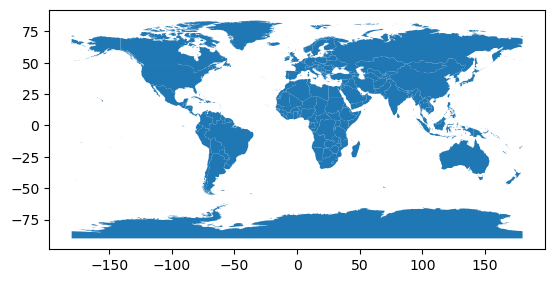

In [10]:
# take a quick look
countries.plot()

In [13]:
# update column names
countries.columns = countries.columns.str.lower()

countries.columns

Index(['featurecla', 'scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'tlc', 'admin',
       ...
       'fclass_tr', 'fclass_id', 'fclass_pl', 'fclass_gr', 'fclass_it',
       'fclass_nl', 'fclass_se', 'fclass_bd', 'fclass_ua', 'geometry'],
      dtype='object', length=169)

In [15]:
# remove some columns
countries_sub = countries[['admin', 'type', 'geometry']]
countries_sub.tail()

,admin,type,geometry
237,Afghanistan,Sovereign country,"POLYGON ((66.52227 37.34849, 66.82773 37.37129..."
238,Siachen Glacier,Indeterminate,"POLYGON ((77.04863 35.10991, 77.00449 35.19634..."
239,Antarctica,Indeterminate,"MULTIPOLYGON (((-45.71777 -60.52090, -45.49971..."
240,Sint Maarten,Country,"POLYGON ((-63.12305 18.06895, -63.01118 18.068..."
241,Tuvalu,Sovereign country,"POLYGON ((179.21367 -8.52422, 179.20059 -8.534..."


## arctic communities

use gpd.read_file to read directly from url

In [16]:
# read in arctic communities data
communities = gpd.read_file('https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4')
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


In [18]:
# we can plot the data together without updating anything because the CRS matches
communities.crs == countries.crs

True

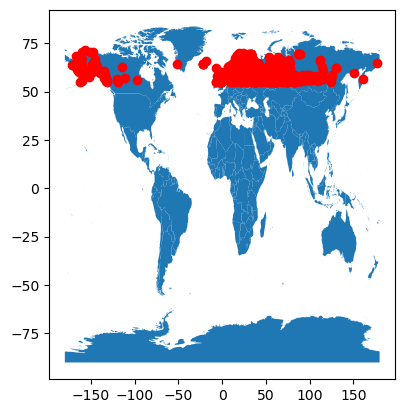

In [26]:
fig, ax = plt.subplots()

countries.plot(ax = ax)
communities.plot(ax = ax,
                color = 'red')

plt.show()

In [46]:
n_comms = communities.groupby('country').count().name

In [47]:
# convert the series to a dataframe
n_comms = pd.DataFrame(n_comms).rename(columns = {'name':'n_communities'}).reset_index()

In [48]:
# select scandinavia data
scandi_codes = ['DK', 'NO', 'SE', 'FO', 'FI', 'IS', 'AX']

scandi_n_comms = n_comms[n_comms.country.isin(scandi_codes)].copy()

scandi_n_comms

,country,n_communities
0,AX,1
3,DK,72
5,FI,98
6,FO,1
9,IS,5
12,NO,48
14,SE,133


## Merge datasets
To merge two datasets they need to have at least one column in common

In [49]:
countries_sub.columns

Index(['admin', 'type', 'geometry'], dtype='object')

In [50]:
scandi_n_comms.columns

Index(['country', 'n_communities'], dtype='object')

We can fix this by adding an 'admin' column to scandi_n_comms

In [52]:
# add country names
scandi_names = ['Aland Islands', 'Denmark', 'Finland', 'Faroe Islands', 'Iceland', 'Norway', 'Sweden']

# add them as a column in the 
scandi_n_comms['admin'] = scandi_names

to merge dataframes we can use pandas.merge()

basic syntax:
```python
output_df = pd.merge(left_df,
                    right_df,
                    how = type_of_join,
                    on = column_to_join)
```

We'll do an inner join of both dataframes

In [53]:
# merge dataframes
scandi_countries = pd.merge(countries_sub,
                            scandi_n_comms,
                           how = 'inner',
                           on = 'admin')

scandi_countries

,admin,type,geometry,country,n_communities
0,Sweden,Sovereign country,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57...",SE,133
1,Norway,Sovereign country,"MULTIPOLYGON (((20.62217 69.03687, 20.49199 69...",NO,48
2,Iceland,Sovereign country,"POLYGON ((-15.54312 66.22852, -15.42847 66.224...",IS,5
3,Finland,Country,"MULTIPOLYGON (((24.15547 65.80527, 24.04902 65...",FI,98
4,Faroe Islands,Dependency,"MULTIPOLYGON (((-6.62319 61.80596, -6.64277 61...",FO,1
5,Denmark,Country,"MULTIPOLYGON (((12.56875 55.78506, 12.57119 55...",DK,72


Notice Aland Islands isn't there. We can verify that aland island is nowhere in original countries dataframe by checking

In [54]:
'Aland Islands' in countries.values

False

In [57]:
# using spatial join
countries_sjoin = countries_sub.sjoin(communities, how="inner", predicate='intersects')

countries_sjoin.groupby('admin').count().name

admin
Aland                         1
Belarus                       8
Canada                        7
Denmark                      63
Estonia                      14
Faroe Islands                 1
Finland                      94
Iceland                       5
Latvia                       23
Lithuania                    26
Norway                       39
Russia                      771
Sweden                      118
United Kingdom               90
United States of America     97
Name: name, dtype: int64

In [62]:
scandi_countries.at['Finland', 'n_communities'] += 1

KeyError: 'Finland'

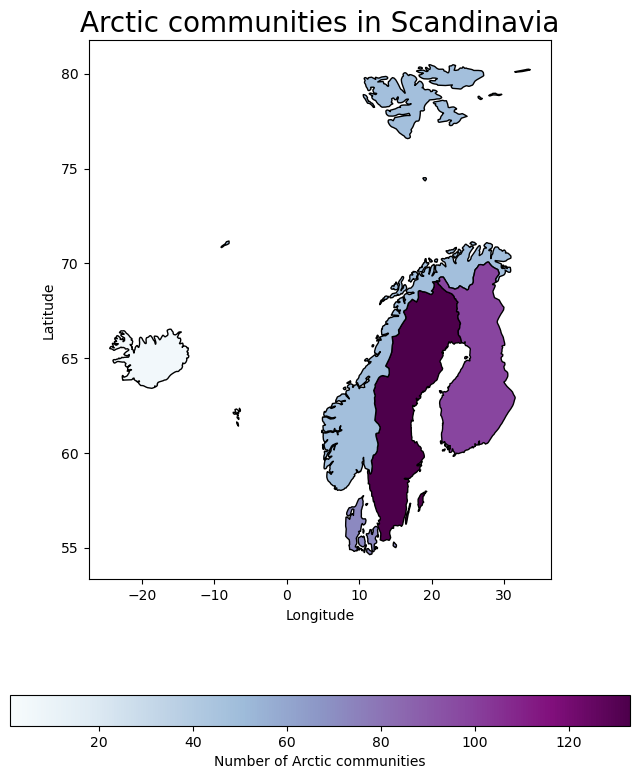

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))

scandi_countries.plot(ax=ax,
                      column='n_communities',
                       cmap='BuPu',
                       legend=True,
                       edgecolor='black',
                       legend_kwds={'shrink':.8,
                                    'label': 'Number of Arctic communities', 
                                    'orientation': 'horizontal'
                                    }
                       )


ax.set_title('Arctic communities in Scandinavia',  fontsize=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()